In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000

In [3]:
ip = np.random.randn(N) > 0

In [4]:
s = 2 * ip - 1

In [5]:
PS_dB = np.arange(start = 0,stop = 50, step = 5)

In [6]:
optimal_covert_rate = np.zeros(len(PS_dB))

In [7]:
r_p = 0.1

beta = -3.5

epsilon = 0.45

BW = 20 * 10**6

PS = 10**(23/ 10) / (10**3)

sigma_square_R = 10**(-160/10) / (10**3) * BW

sigma_square_D = 10**(-160/10) / (10**3) * BW

sigma_square_bar_w = 10**(-160/10) / (10**3) * BW

sigma_square_SI = 10**(-160/10) / (10**3) * BW

zeta = 10**(5/10)


PL_DR = (1/10**3) * (np.sqrt(np.square(100)+np.square(100)) / 1)**beta

PL_SR = (1/10**3) * (np.sqrt(np.square(100) + np.square(100))/1)**beta

PL_SD = (1/10**3) * (np.sqrt(np.square(200) + np.square(0))/1)**beta

PL_DW = (1/10**3) * (np.sqrt(np.square(100)+np.square(100)))

PL_DD = sigma_square_SI


In [8]:
covert_capacity = np.zeros(len(PS_dB))


In [9]:
def minimum_PD(h_DR,h_SR,h_SD,h_DW,h_DD,PS):
    
    min_value = []
    
    PR = (1/np.abs(h_DR)**2) * ((np.abs(h_SR)**2 * PS) /(2**r_p-1) - sigma_square_R )
    
    min_value.append(PR)
    
    PD = (1/np.abs(h_DD)**2) * ((np.abs(h_SD)**2 * PS)/(2**r_p - 1)-sigma_square_D)
    
    min_value.append(PD)
    
    dep = (zeta**(1-4 * epsilon) - (1/zeta))* (sigma_square_bar_w / np.abs(h_DW)**2)
    
    
    min_value.append(dep)
    
    PD = min(min_value)
    
    return PD
    
    
    

In [10]:
def covert_rate():
    
    for jj in range(len(PS_dB)):
        
        PS = 10**(PS_dB[jj])/10 / (10**3)
        
        total_capacity = 0

        for ii in range(N):
            
            h_DR = np.sqrt(PL_DR) * (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            h_SR = np.sqrt(PL_SR) * (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            h_SD = np.sqrt(PL_SD) * (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            h_DW = np.sqrt(PL_DW) * (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            h_DD_tilde = np.sqrt(PL_DD) * (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn())

            PD = minimum_PD(h_DR,h_SR,h_SD,h_DW,h_DD_tilde,PS)
            
            c = np.log2(1 + (np.abs(h_DR)**2 * PD)/(sigma_square_R))
            
            total_capacity = total_capacity + c
            
        optimal_covert_rate[jj] = total_capacity / N
        
    return optimal_covert_rate
        
    

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22192\2527531760.py:23: RuntimeWarning: invalid value encountered in log2
  c = np.log2(1 + (np.abs(h_DR)**2 * PD)/(sigma_square_R))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22192\2527531760.py:23: RuntimeWarning: divide by zero encountered in log2
  c = np.log2(1 + (np.abs(h_DR)**2 * PD)/(sigma_square_R))


[           nan            nan 2.36062831e-10            nan
 1.85076233e-10 1.93179179e-10 2.26465140e-10            nan
            nan            nan]


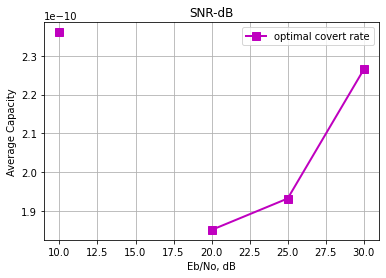

In [11]:
optimal_rate = covert_rate()
print(optimal_rate)
plt.figure()

plt.plot(PS_dB, optimal_rate, 'ms-', linewidth=2, markersize=8, label='optimal covert rate')

plt.grid(True)

plt.legend()

plt.xlabel('Eb/No, dB')

plt.ylabel('Average Capacity')

plt.title('SNR-dB')

plt.show()